# KRK Fault SP vs DP

## Run C++ examples

In [1]:
%%bash
TOP=${TOP:-$(git rev-parse --show-toplevel)}
PATH=${TOP}/build/Examples/Cxx

#1ms simulation
DURATION=20
STARTTIMEFAULT=10
ENDTIMEFAULT=10.2
TIMESTEP=1e-3
TIMESTEPSTR=$(printf "%1.6f\n" ${TIMESTEP})

SP_SynGenTrStab_KRK_TwoArea_SteadyState

[15:59:31.112156 PiLine56 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[15:59:31.112348 PiLine67 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[15:59:31.112543 Piline78_1 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[15:59:31.112755 Piline78_2 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[15:59:31.112991 Piline89_1 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[15:59:31.113284 Piline89_2 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[15:59:31.113596 PiLine910 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[15:59:31.113878 PiLine1011 warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[15:59:31.114850 SP_SynGenTrStab_KRK_TwoArea_SteadyState_PF info] Initialize simulation: SP_SynGenTrStab_KRK_TwoArea_SteadyState_PF
[15:59:31.116653 SP_SynGenTrStab_KRK_TwoArea_SteadyState_

In [2]:
import villas.dataprocessing.readtools as rt
from villas.dataprocessing.timeseries import TimeSeries as ts
import matplotlib.pyplot as plt
import re
import numpy as np
import math
import os
from datetime import date
import pandas as pd

%matplotlib widget

In [13]:
# Read results
# import villas.dataprocessing.readtools as rt
# from villas.dataprocessing.timeseries import TimeSeries as ts

V_nom = 230e3

work_dir = 'logs/SP_SynGenTrStab_KRK_TwoArea_SteadyState_PF/'
log_name = 'SP_SynGenTrStab_KRK_TwoArea_SteadyState_PF'

print(work_dir + log_name + '.csv')

ts_pfsimpy = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

results=pd.DataFrame()
results = pd.DataFrame(columns=['Bus', 'Voltage Mag [V]', 'Voltage Ang [deg]'])
i = 0

for node,node_data in ts_pfsimpy.items():
    results.loc[i] = [node] + ["{0:.3f}".format(np.absolute(ts_pfsimpy[node].values[-1])/V_nom)] + ["{0:.3f}".format(np.degrees(np.angle(ts_pfsimpy[node].values[-1])) - 6.8)]
    i += 1

print(results)

logs/SP_SynGenTrStab_KRK_TwoArea_SteadyState_PF/SP_SynGenTrStab_KRK_TwoArea_SteadyState_PF.csv
column number: 7
results length: 2
real column names: []
complex column names: ['v_bus10', 'v_bus11', 'v_bus5', 'v_bus6', 'v_bus7', 'v_bus8', 'v_bus9']
       Bus Voltage Mag [V] Voltage Ang [deg]
0  v_bus10           1.010           -16.578
1  v_bus11           1.030            -6.800
2   v_bus5           1.030            18.103
3   v_bus6           1.010             8.517
4   v_bus7           1.006             0.664
5   v_bus8           0.996           -12.015
6   v_bus9           1.012           -24.495


## Results 1ph SP

In [4]:
work_dir = 'logs/SP_SynGenTrStab_KRK_TwoArea_SteadyState_SP/'
log_name = 'SP_SynGenTrStab_KRK_TwoArea_SteadyState_SP'
print(work_dir + log_name + '.csv')
ts_sp1ph_TrStab_dl= rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

logs/SP_SynGenTrStab_KRK_TwoArea_SteadyState_SP/SP_SynGenTrStab_KRK_TwoArea_SteadyState_SP.csv
column number: 55
results length: 30000
real column names: ['Ep_gen1', 'Ep_gen2', 'Ep_gen3', 'Ep_gen4', 'P_elec1', 'P_elec2', 'P_elec3', 'P_elec4', 'P_mech1', 'P_mech2', 'P_mech3', 'P_mech4', 'delta_gen1', 'delta_gen2', 'delta_gen3', 'delta_gen4', 'wr_gen1', 'wr_gen2', 'wr_gen3', 'wr_gen4']
complex column names: ['i_gen1', 'i_gen2', 'i_gen3', 'i_gen4', 'i_line1011', 'i_line56', 'i_line67', 'i_line78_1', 'i_line78_2', 'i_line89_1', 'i_line89_2', 'i_line910', 'i_load7', 'i_load9', 'v10', 'v11', 'v5', 'v6', 'v7', 'v8', 'v9', 'v_gen1', 'v_gen2', 'v_gen3', 'v_gen4', 'v_line1011', 'v_line56', 'v_line67', 'v_line78_1', 'v_line78_2', 'v_line89_1', 'v_line89_2', 'v_line910', 'v_load7', 'v_load9']


## Parameters

In [5]:
timestep=50e-6
t_begin=0
t_end=20

begin_idx = int(t_begin/timestep)
end_idx= int(t_end/timestep)

## Generator terminal voltage

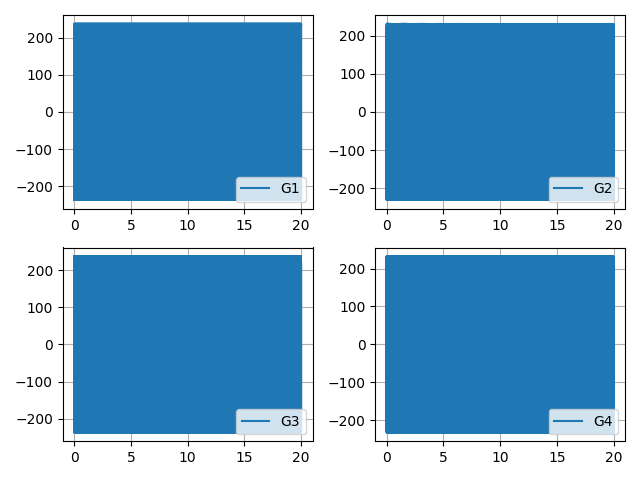

In [6]:
plt.figure()
# plt.title('SMIB generator terminal voltage')
plt.xlabel('time (s)')
plt.ylabel('voltage (kV)')

plt.subplot(2, 2, 1)
for name in ['v_gen1']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='G1')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.subplot(2, 2, 2)
for name in ['v_gen2']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='G2')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.subplot(2, 2, 3)
for name in ['v_gen3']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='G3')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.subplot(2, 2, 4)
for name in ['v_gen4']:
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='G4')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
    
# plt.xlim(9,11)
# plt.ylim(-300,300)
#     plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_dp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], linestyle='--', label='DP')
    
# plt.xlim(9.98,10.2)
# plt.ylim(-800,800)


## Generator terminal Current

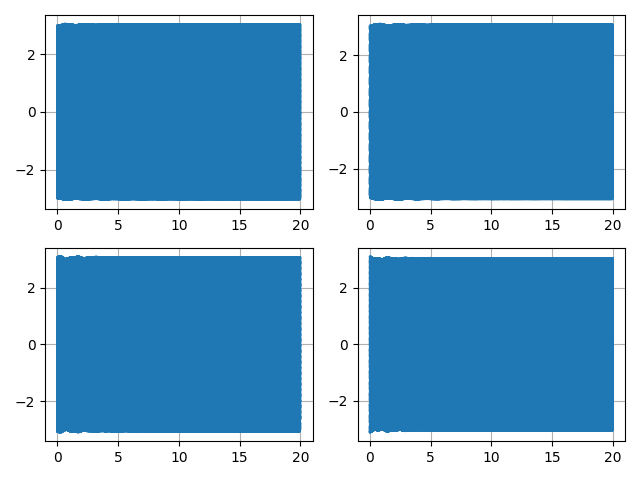

In [7]:
plt.figure()
# plt.title('SMIB generator terminal current')
plt.xlabel('time (s)')
plt.ylabel('current (kA)')

plt.subplot(2,2,1)
for name in ['i_gen1']:
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], color='black')
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='REF backshift', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='DP', linestyle='--')
plt.grid()
plt.tight_layout()

plt.subplot(2,2,2)
for name in ['i_gen2']:
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], color='black')
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='REF backshift', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='DP', linestyle='--')
plt.grid()
plt.tight_layout()

plt.subplot(2,2,3)
for name in ['i_gen3']:
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], color='black')
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='REF backshift', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='DP', linestyle='--')
plt.grid()
plt.tight_layout()

plt.subplot(2,2,4)
for name in ['i_gen4']:
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], color='black')
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='REF backshift', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='DP', linestyle='--')
plt.grid()
plt.tight_layout()


# plt.legend(loc='lower right')
# plt.xlim(9.98,10.2)
# plt.ylim(-250,250)


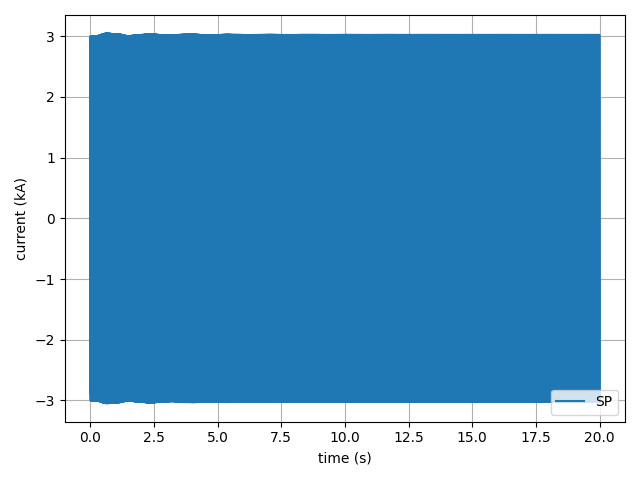

In [8]:
plt.figure()
# plt.title('SMIB generator terminal current')
plt.xlabel('time (s)')
plt.ylabel('current (kA)')


for name in ['i_line56']:
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], color='black')
#    plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-3*ts_ref_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='REF backshift', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_sp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='SP')
    #plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-3*ts_dp1ph_TrStab_dl[name].interpolate(timestep).frequency_shift(60).values[begin_idx:end_idx], label='DP', linestyle='--')
    
plt.legend(loc='lower right')
# plt.xlim(9.98,10.2)
# plt.ylim(-250,250)
plt.grid()
plt.tight_layout()

## Generator electrical & mechanical energy

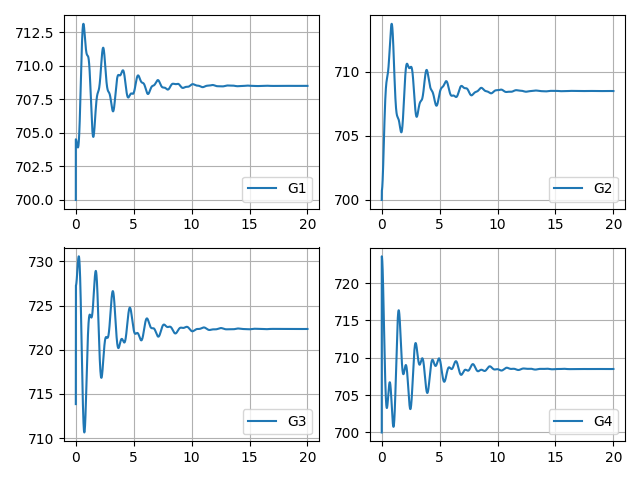

In [9]:
plt.figure()
# plt.title('SMIB generator power')
plt.xlabel('time (s)')
plt.ylabel('power (MW)')

# for name in ['P_elec1']:
#     plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-6*ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], color='black')
#     plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  1e-6*ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='REF', color='black', linestyle=':' )
#     plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_dp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='DP', linestyle='--')
    
plt.subplot(2,2,1)
for name in ['P_elec1']:    
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='G1')

#     plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='SP')  
#     plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_dp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], linestyle='--', label='DP')
plt.legend(loc='lower right')
# plt.xlim(9,12)
# plt.ylim(450, 750)
plt.grid()
plt.tight_layout()

plt.subplot(2,2,2)
for name in ['P_elec2']:    
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='G2')

#     plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='SP')  
#     plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_dp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], linestyle='--', label='DP')
plt.legend(loc='lower right')
# plt.xlim(9,12)
# plt.ylim(450, 750)
plt.grid()
plt.tight_layout()

plt.subplot(2,2,3)
for name in ['P_elec3']:    
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='G3')

#     plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='SP')  
#     plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_dp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], linestyle='--', label='DP')
plt.legend(loc='lower right')
# plt.xlim(9,12)
# plt.ylim(550, 750)
plt.grid()
plt.tight_layout()

plt.subplot(2,2,4)
for name in ['P_elec4']:    
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='G4')

#     plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], label='SP')  
#     plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], 1e-6*ts_dp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx], linestyle='--', label='DP')
plt.legend(loc='lower right')
# plt.xlim(9,12)
# plt.ylim(450, 750)
plt.grid()
plt.tight_layout()


## Rotor angular speed $\omega_r$

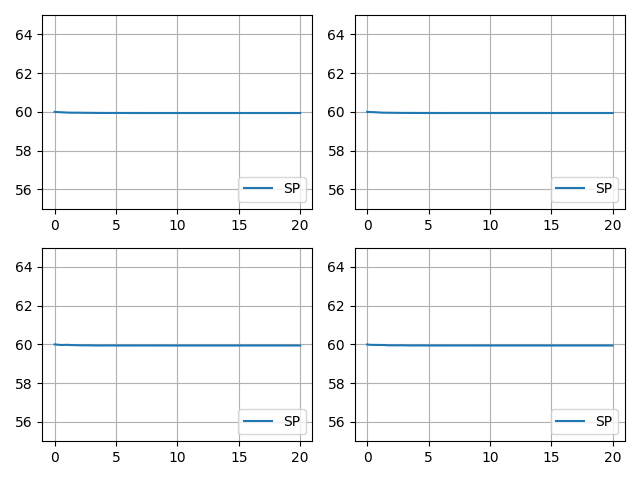

In [10]:
plt.figure()
# plt.title('SMIB Rotor angle')
plt.xlabel('time (s)')
plt.ylabel('Frequency (Hz)')

plt.subplot(2,2,1)
for name in ['wr_gen1']:
#      plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='REF', color='black')
#     plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='REF', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*60/377, label='SP')
#     plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], ts_dp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='DP', linestyle='--')
plt.legend(loc='lower right')
# plt.axvline(x=10,  color='red', linewidth=2, linestyle=':')
# plt.axvline(x=10.2,  color='red', linewidth=2, linestyle=':')
# plt.xlim(8,15)
plt.ylim(55,65)
plt.grid()
plt.tight_layout()

plt.subplot(2,2,2)
for name in ['wr_gen2']:
#      plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='REF', color='black')
#     plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='REF', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*60/377, label='SP')
plt.legend()
#     plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], ts_dp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='DP', linestyle='--')

plt.legend(loc='lower right')
# plt.axvline(x=10,  color='red', linewidth=2, linestyle=':')
# plt.axvline(x=10.2,  color='red', linewidth=2, linestyle=':')
# plt.xlim(8,15)
plt.ylim(55,65)

plt.grid()
plt.tight_layout()

plt.subplot(2,2,3)
for name in ['wr_gen3']:
#      plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='REF', color='black')
#     plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='REF', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*60/377, label='SP')
plt.legend()
#     plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], ts_dp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='DP', linestyle='--')

plt.legend(loc='lower right')
# plt.axvline(x=10,  color='red', linewidth=2, linestyle=':')
# plt.axvline(x=10.2,  color='red', linewidth=2, linestyle=':')
# plt.xlim(8,15)
plt.ylim(55,65)

plt.grid()
plt.tight_layout()

plt.subplot(2,2,4)
for name in ['wr_gen4']:
#      plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='REF', color='black')
#     plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='REF', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*60/377, label='SP')
plt.legend()
#     plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], ts_dp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='DP', linestyle='--')

plt.legend(loc='lower right')
# plt.axvline(x=10,  color='red', linewidth=2, linestyle=':')
# plt.axvline(x=10.2,  color='red', linewidth=2, linestyle=':')
# plt.xlim(8,15)
plt.ylim(55,65)

plt.grid()
plt.tight_layout()

## Rotor angle $\delta _r$

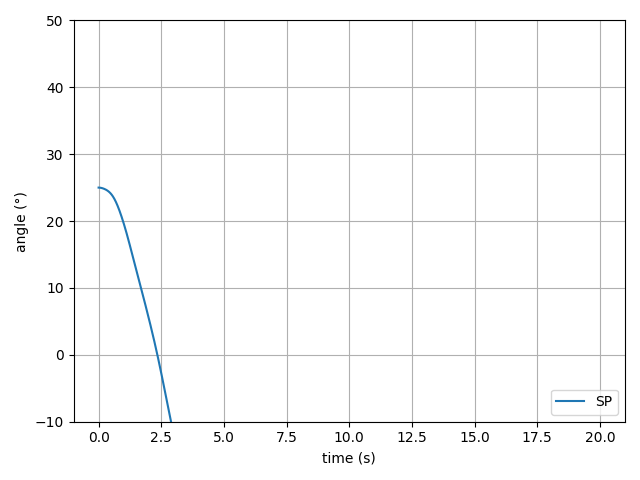

In [11]:
plt.figure()
# plt.title('SMIB Rotor angle')
plt.xlabel('time (s)')
plt.ylabel('angle (°)')

for name in ['delta_gen1']:
#      plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='REF', color='black')
#     plt.plot(ts_ref_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx],  ts_ref_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='REF', color='black', linestyle=':' )
    plt.plot(ts_sp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], ts_sp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='SP')
#     plt.plot(ts_dp1ph_TrStab_dl[name].interpolate(timestep).time[begin_idx:end_idx], ts_dp1ph_TrStab_dl[name].interpolate(timestep).values[begin_idx:end_idx]*180/3.14, label='DP', linestyle='--')

plt.legend(loc='lower right')
# plt.axvline(x=10,  color='red', linewidth=2, linestyle=':')
# plt.axvline(x=10.2,  color='red', linewidth=2, linestyle=':')
# plt.xlim(8,15)
plt.ylim(-10,50)

plt.grid()
plt.tight_layout()

# plt.savefig("./plotting/Output/" + str(date.today()) + '_Implementation_SMIB_angle' + '.pdf')
